# Validate the Changing Trend of $\frac{\mathbb{E}{\tau_{\delta}}}{T^*}$

In [ ]:
# import packages
import sys  
sys.path.append('./Source/')

from Source.agent import D_Tracking, C_Tracking
from Source.env import Env__Deterministic_Consumption
from Source.utils import Get_Lower_Bound_pulling

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## D-Tracking

In [2]:
# conduct the experiment
n_experiments = 100
delta_ = [0.1, 0.05, 0.01, 0.005, 0.001]
# delta_ = [0.1, 0.09, 0.08, 0.07]
# delta_ = [0.1]

# container of numeric record
pulling_times = dict()
predicted_arm = dict()
best_arm = dict()

pulling_times["D-Tracking"] = np.zeros((len(delta_), n_experiments))
predicted_arm["D-Tracking"] = np.zeros((len(delta_), n_experiments))
best_arm["D-Tracking"] = np.zeros((len(delta_), n_experiments))

# synthesis setting
mu = np.array([0.5, 0.2, 0.3, 0.4])
K = 4

# run the algorithm
np.random.seed(12345)
for (ii, delta) in enumerate(delta_):
    for exp_id in tqdm(range(n_experiments)):
        # shuffle the best arm
        mu_temp = mu.copy()
        np.random.shuffle(mu_temp)
        best_arm["D-Tracking"][ii, exp_id] = np.argmax(mu_temp) + 1
        
        # create the agent instance and run the experiment
        env = Env__Deterministic_Consumption(K=K, d=np.ones(K), r=mu_temp, random_seed=exp_id)
        agent = D_Tracking(K=K, delta=delta)
        while not agent.if_stop:
            action = agent.action()
            reward, demand = env.response(action=action)
            agent.observe(r=reward, d=demand)
        predicted_arm["D-Tracking"][ii, exp_id] = agent.predict()
        pulling_times["D-Tracking"][ii, exp_id] = agent.t - 1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [36:52<00:00, 22.13s/it]


delta: 0.1, accuracy: 0.96
delta: 0.05, accuracy: 0.91
delta: 0.01, accuracy: 0.97
delta: 0.005, accuracy: 0.96
delta: 0.001, accuracy: 0.98


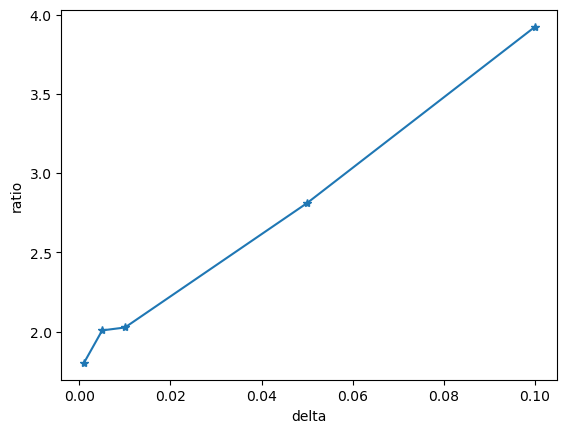

In [3]:
# plot plot the result
x = np.array(delta_)
y = np.zeros(len(delta_))
for (ii, delta) in enumerate(delta_):
    lower_bound = Get_Lower_Bound_pulling(mu, delta)
    y[ii] = np.mean(pulling_times["D-Tracking"][ii, :]) / lower_bound
plt.plot(x, y, "*-")
plt.xlabel("delta")
plt.ylabel("ratio")

for (ii, delta) in enumerate(delta_):
    accr = np.sum(predicted_arm["D-Tracking"][ii, :] == best_arm["D-Tracking"][ii, :]) / n_experiments
    print(f"delta: {delta}, accuracy: {accr}")

In [4]:
# save the numeric record
np.save("delta.npy", np.array(delta_))
np.save("pulling_times-D.npy", pulling_times["D-Tracking"])
np.save("predicted_arm-D.npy", predicted_arm["D-Tracking"])
np.save("best_arm-D.npy", best_arm["D-Tracking"])

## C-Tracking

In [1]:
# import packages
import sys  
sys.path.append('./Source/')

from Source.agent import D_Tracking, C_Tracking
from Source.env import Env__Deterministic_Consumption
from Source.utils import Get_Lower_Bound_pulling

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# conduct the experiment
n_experiments = 100
delta_ = [0.1, 0.05, 0.01, 0.005, 0.001]
# delta_ = [0.1, 0.09, 0.08, 0.07]
# delta_ = [0.1]

# container of numeric record
pulling_times = dict()
predicted_arm = dict()
best_arm = dict()

pulling_times["C-Tracking"] = np.zeros((len(delta_), n_experiments))
predicted_arm["C-Tracking"] = np.zeros((len(delta_), n_experiments))
best_arm["C-Tracking"] = np.zeros((len(delta_), n_experiments))

# synthesis setting
mu = np.array([0.5, 0.2, 0.3, 0.4])
K = 4

# run the algorithm
np.random.seed(12345)
for (ii, delta) in enumerate(delta_):
    for exp_id in tqdm(range(n_experiments)):
        # shuffle the best arm
        mu_temp = mu.copy()
        np.random.shuffle(mu_temp)
        best_arm["C-Tracking"][ii, exp_id] = np.argmax(mu_temp) + 1
        
        # create the agent instance and run the experiment
        env = Env__Deterministic_Consumption(K=K, d=np.ones(K), r=mu_temp, random_seed=exp_id)
        agent = C_Tracking(K=K, delta=delta)
        while not agent.if_stop:
            action = agent.action()
            reward, demand = env.response(action=action)
            agent.observe(r=reward, d=demand)
        predicted_arm["C-Tracking"][ii, exp_id] = agent.predict()
        pulling_times["C-Tracking"][ii, exp_id] = agent.t - 1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [23:52<00:00, 14.33s/it]


delta: 0.1, accuracy: 0.98
delta: 0.05, accuracy: 0.96
delta: 0.01, accuracy: 0.99
delta: 0.005, accuracy: 1.0
delta: 0.001, accuracy: 1.0


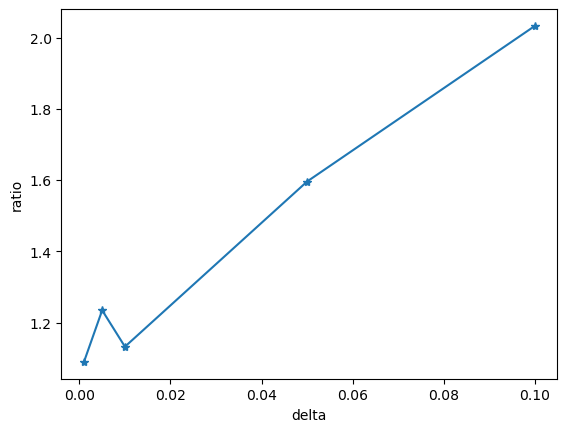

In [3]:
# plot plot the result
x = np.array(delta_)
y = np.zeros(len(delta_))
for (ii, delta) in enumerate(delta_):
    lower_bound = Get_Lower_Bound_pulling(mu, delta)
    y[ii] = np.mean(pulling_times["C-Tracking"][ii, :]) / lower_bound
plt.plot(x, y, "*-")
plt.xlabel("delta")
plt.ylabel("ratio")

for (ii, delta) in enumerate(delta_):
    accr = np.sum(predicted_arm["C-Tracking"][ii, :] == best_arm["C-Tracking"][ii, :]) / n_experiments
    print(f"delta: {delta}, accuracy: {accr}")

In [4]:
# save the numeric record
np.save("pulling_times-C.npy", pulling_times["C-Tracking"])
np.save("predicted_arm-C.npy", predicted_arm["C-Tracking"])
np.save("best_arm-C.npy", best_arm["C-Tracking"])

# Plot the data to see the distribution of pulling times

In [1]:
import numpy as np
import matplotlib.pyplot as plt

pulling_C = np.load("pulling_times-C.npy")
pulling_D = np.load("pulling_times-D.npy")

Text(0.5, 0.98, 'C-Tracking')

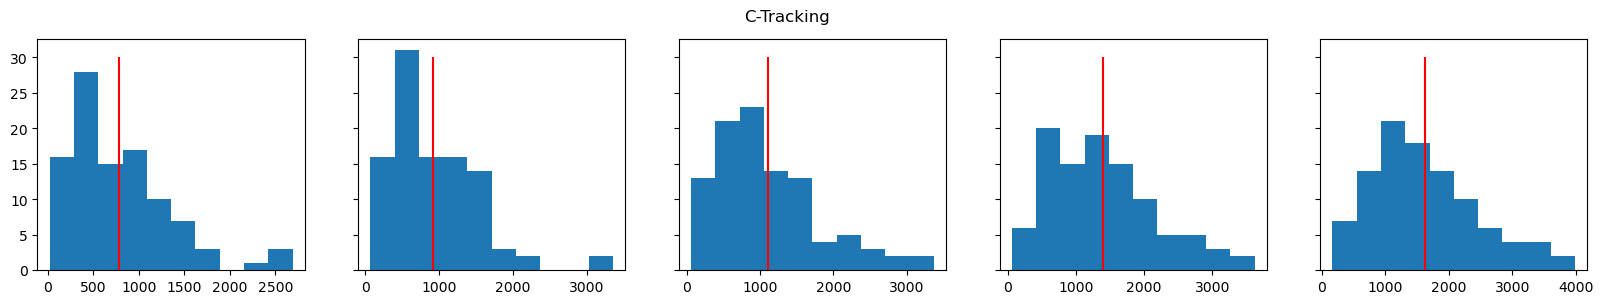

In [18]:
fig, ax_ = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(20, 3))

for ii, ax in enumerate(ax_):
    ax.hist(pulling_C[ii, :])
    ax.vlines(x = np.mean(pulling_C[ii, :]), ymin=0, ymax=30, color="red")
fig.suptitle("C-Tracking")

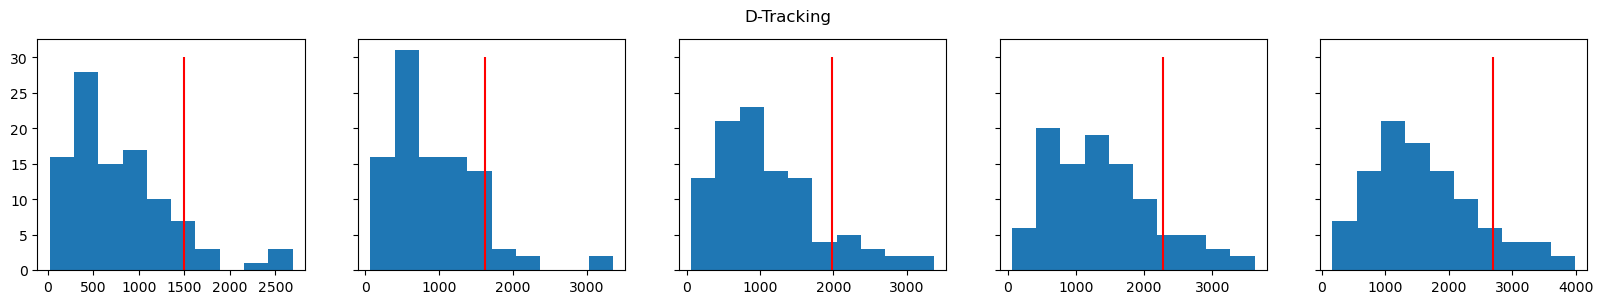

In [19]:
fig, ax_ = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(20, 3))

for ii, ax in enumerate(ax_):
    ax.hist(pulling_C[ii, :])
    ax.vlines(x = np.mean(pulling_D[ii, :]), ymin=0, ymax=30, color="red")
    fig.suptitle("D-Tracking")